<a href="https://colab.research.google.com/github/ElenaBara21/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Press SHIFT + CMD + SPACE to read the docstrings

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

# Examples regression problems
* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should I have each week for fuel? - predicting a numbers
* or predicting coordinates
# Regression analysis
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds 
the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion. 





 ❗ **Resource** - Hands on Machine Learning with Scikit learn, Keras and TensorFlow, 2nd edition by AG

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for our regression problems but in our case we're going to simplify it: predicting a numerical varriable based on some other combination of variables even shorter - predicting a number.



In [3]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


# Creating a data to view and fit

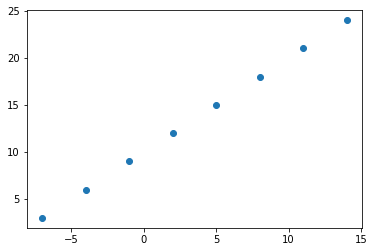

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Create features(Independent)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels(y-dependant)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y);

In [5]:
#y == X + 10

# Input and Output shapes

In [6]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [8]:
house_info.shape
X[0], y[0]

(-7.0, 3.0)

In [9]:
X[1], y[1]

(-4.0, 6.0)

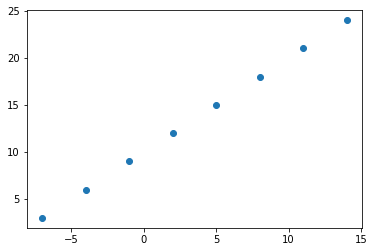

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Our goal here will be to use X to predict y.

So our **input** will be X and our **output** will be y.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [11]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specificially a rank 0 tensor or a scalar.

In [12]:
X[0].ndim

0

In [13]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [14]:

# #Turn our Numpy arrays into tensors
# X = tf.cast(tf.constant(X), dtype=tf.float32)
# y = tf.cast(tf.constant(X), dtype=tf.float32)
# X,y

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - define the loss function (in others words the function which tells our model how wrong it is) and optimizer (tells our model how to improve the patterns its learning) and evaluation metrics(what can we use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and y(feautures 
Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [16]:
#Optionally the first layer can receive an "input shape" argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
...


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)






Epoch 1/5
1/1 [==============================] - 1s 507ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9748 - mae: 10.9748


In [18]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
#Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.
1. **Creating a model** -where we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, cheange the activation functions of each layer
2. **Compiling a model** here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting model** here we might fit a model for more **epochs** (leave it training for longer) or more data (give the more examples to learn from.
![image.png](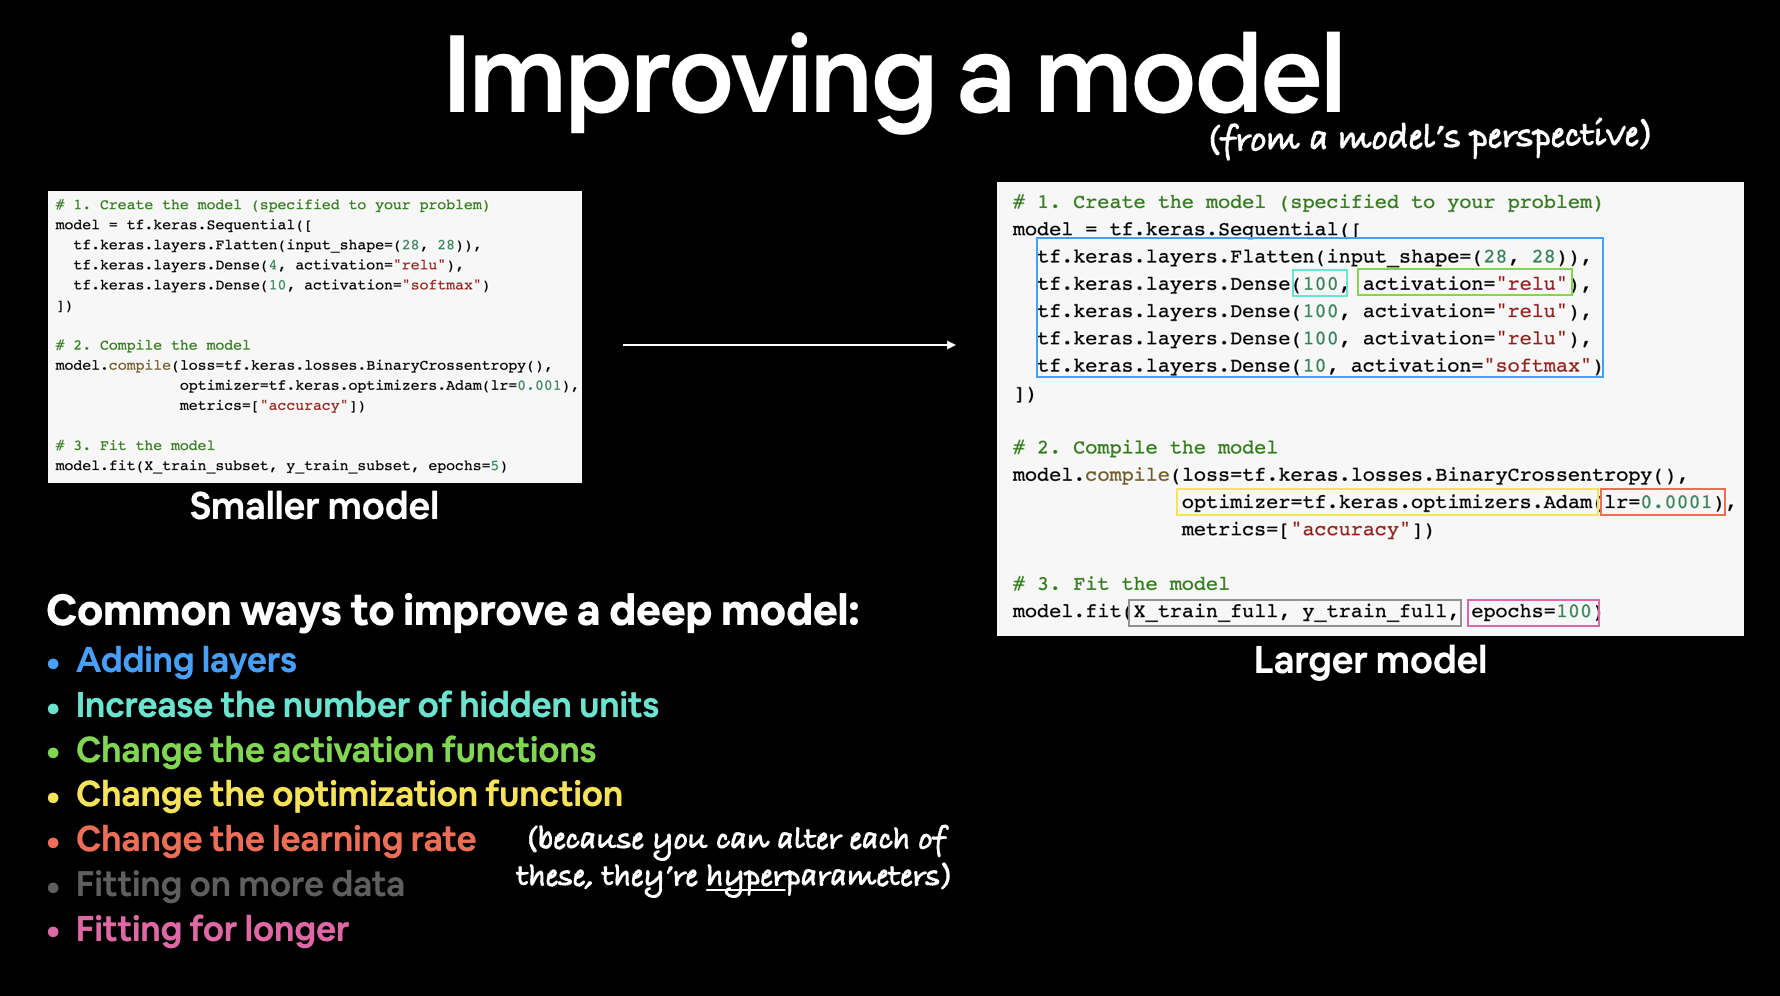AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxZ/x8I1QmgJjLVSwAAAABJRU5ErkJggg==)
various options you can use to improve a neural network model There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2.Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs 





Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s

In [21]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
#Lets see if our model's predictions has improved
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [23]:
# Let's see if we can make another to improve our model
# Set random seed
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2.Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 400ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 6.75

In [24]:
#Lets see if our model's predictions has improved
model.predict([17.0])

array([[27.216782]], dtype=float32)

# Improving a model
**Common ways to improve a deep model**
* Adding layers
* Change the activation function
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer by altering epochs

# Evaluating a model
In practice a typical workflow you will go through when building neural networks is:
**Build a model** -> fit it -> evaluate it -> tweak a model ->fit it -> evaluate it > tweak a model 

When it comes to evaluation there are 3 words you should memorize:
"Vizualize, visualize, visualize"

Its a good idea to visualize:
* The data what data are we working with?
what does it look like?
* The model itself - what does our model look like?
* The training of a model - how it perform while its learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(The original labels)?

In [25]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

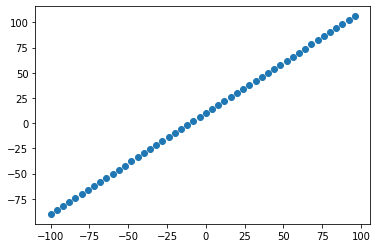

In [27]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

# The 3 sets splitting data into training/test set
* training set - the model learns from this data which is typically 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what is has learned this set is typically 10-15% of the total data available

In [28]:
# Check the length of how many samples we have
len(X)


50

In [29]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)



(40, 10)

### Visualising the data
Now we have got our data in training and test sets lets visualising it again!

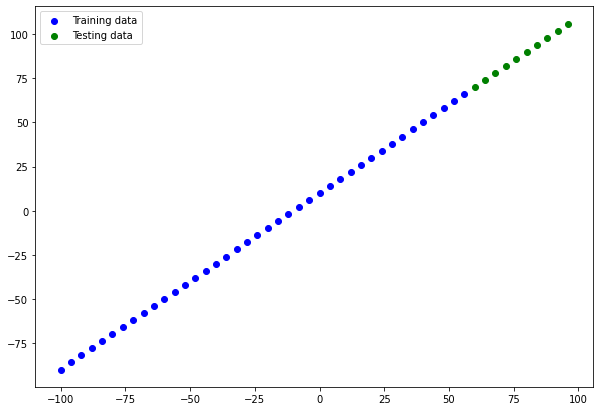

In [30]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();


In [31]:
#Lets have a look at how to build a neuralnetwork for our data
# Set random seed
tf.random.set_seed(42)

# 1.Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model 
#model.fit=t(X_train, y_train, epochs=100)



# Visualizing the model


In [33]:
model.summary()

ValueError: ignored

In [35]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

### Lets create a model which builds automatically by defining the input_shape argument in the first layer


In [36]:
tf.random.set_seed(42)
#1.Create a model(same as above)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                             tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")
# 2. Compile the model(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters(patterns) the model can update as trains
*Non-trainable params - these parameters arent updated during training(this is typical  when you bring in already learn patterns or parameters from other models during **transfer learning**)

✅ **Resource** - for more in-depth overview of the trainable 
mit intro to deep learning(fdeep learning.com

♣  Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

In [38]:
# Lets fit our model to the training data
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])
# model.fit(X_train, y_train, epochs=100, verbose=0)
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 5ms/

In [39]:
#Get summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


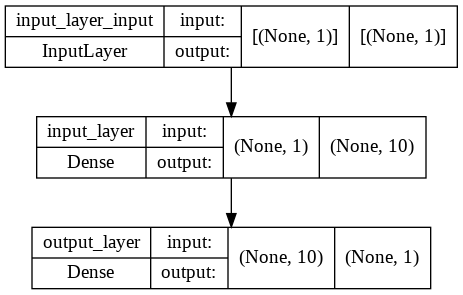

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize  predictions iy's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_true' versus 'y_pred' (ground truth versus your model's predictions).


In [41]:
#Make some predictions - должны совпадать с y_test у меня не совпало
y_preds = model.predict(X_test)
y_preds

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

⚡ **Note** If you feel like you're going to reuse some kind of functionality in the future it's a good idea to turn it into a function.

In [43]:
#Lets predict the plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

In [45]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

NameError: ignored

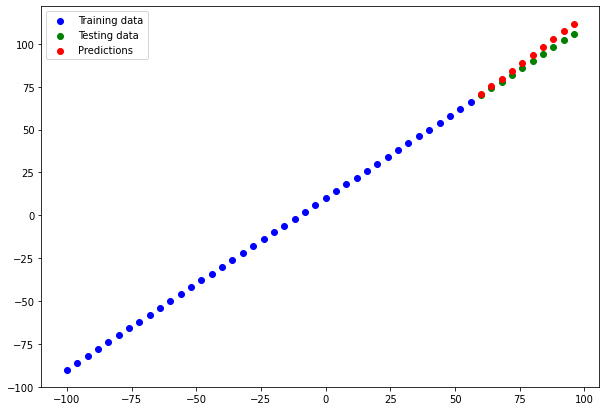

In [46]:
plot_predictions()

In [47]:
#Fairly large error the way we can figure this out is by the evaluaion metrics
# by adding another layer to a model or changing optimizer


### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on there will bedefferent evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average how wrong is each of my model's predictions
*MSE - mean square error, "square the average error's"

In [48]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 135ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [49]:
#Calculate  the mean absolute error
#tf.keras.losses.mae(y_pred, y_test) both of them valid code
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [50]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [51]:
y_preds.shape

(10, 1)

In [52]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [54]:
# Shape after squeeze()
y_test, y_preds.squeeze()

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
         93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
       dtype=float32))

In [55]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [56]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [57]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [58]:
#Huber
#tf.keras.losses.Huber()

In [59]:
#Make some function to reuse mae and mse
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred=tf.squeeze(y_preds))
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred=tf.squeeze(y_preds))

### Running experiments to improve our model

"""
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it ->fit it ...
"""

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in data.

Let's do a 3 modelling experiments:
1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs.
3. 'model_3' - 2 layers, trained for 500 epochs.
4. 
5. 

**Build model 1**

In [60]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

In [61]:
#X_train, y_train

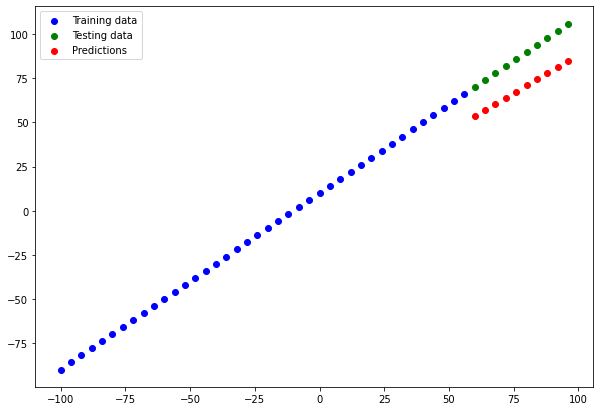

In [62]:
# Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [63]:
# y_preds_1

In [64]:
# tf.constant(y_preds_1), tf.squeeze(y_preds_1)

In [65]:
#Ошибка
#Calculate model_1 evaluation metrics - найти ошибку
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(3.1969407, 13.070143)

**Build model_2**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [79]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

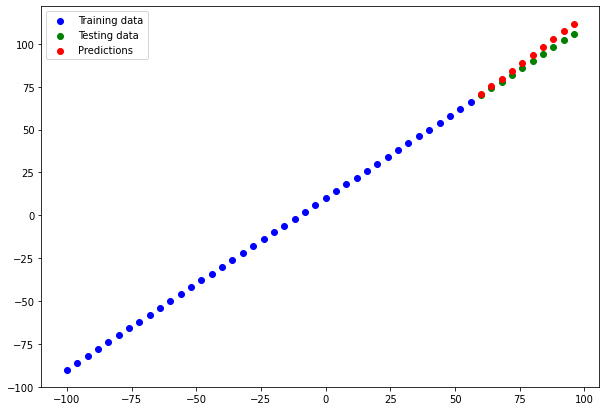

In [81]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [82]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(3.1969407, 13.070143)

**Build model_3**

2 layers, trained for 500 epochs

In [83]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500) # set verbose to 0 for less output

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/500
2/2 [==============================] - 0s 5ms/st

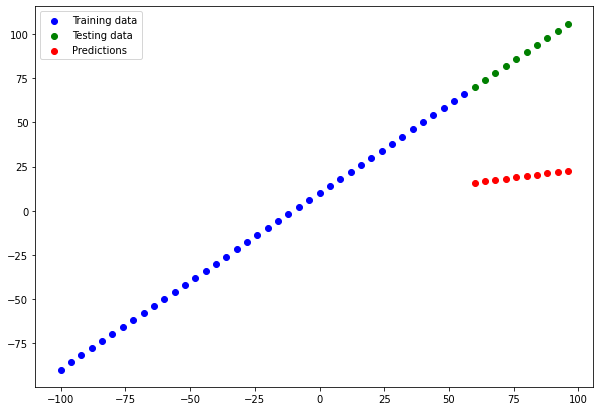

In [84]:
#Make and plot some predictions #Overfitting
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [85]:
#Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(3.1969407, 13.070143)

**Note** You want to start with small (small models) experiment and make sure they work and then increase their scale when necessary.


## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [86]:
#Lets compare our modals results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]
      
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,3.196941,13.070143
1,model_2,3.196941,13.070143
2,model_3,3.196941,3.196941


In [87]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


✅ **Note** One of your main goals should be to minimize the time between your experiments. The more experiments you do the more things you'll figure out which don't work and in turn get closer to figuring out what does work. Remember the machine learning practicioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily there are tools to help us!

⚡ **Resources** As you build more models you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights and Biases a tool for tracking all of machine learning experiments (plugs straight into TensorBoard).
https://www.tensorflow.org/tensorboard

https://wandb.ai/site

## Saving our models
Saving our models allows us to use them outside of google colab(or wherever theywere trained) such as in a web applications or a mobile app. There are two main formats we can save our models to: 

1. The Saved model format
2. The HDF5 format


In [88]:
# Save model
model_2.save("best_model_SavedModel_format")


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [89]:
# Save model using the HDF5 format
model_2.save("best_model_format.h5")



### Loading in a saved model


In [90]:
#Load in SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_2.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [101]:
#Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
tf.squeeze(model_2_preds) == tf.squeeze(loaded_SavedModel_format_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [96]:
#Ошибка
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

TypeError: ignored

In [99]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [98]:
loaded_SavedModel_format_preds.squeeze()

array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)